In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf

In [2]:
df = pd.read_csv("train.csv")
df1 = df.copy()
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#df.dropna(inplace=True)

In [7]:
df1['CryoSleep'].fillna(0.5 , inplace=True)
df1['VIP'].fillna(0.5 , inplace=True)
df1['Destination'].fillna('Unknown' , inplace=True)
df1['HomePlanet'].fillna('Unknown' , inplace=True)

In [8]:
df1['Age'].fillna(df1['Age'].mean() , inplace=True)
df1['RoomService'].fillna(df1['RoomService'].mean() , inplace=True)
df1['ShoppingMall'].fillna(df1['ShoppingMall'].mean() , inplace=True)
df1['Spa'].fillna(df1['Spa'].mean() , inplace=True)
df1['VRDeck'].fillna(df1['VRDeck'].mean() , inplace=True)
df1['FoodCourt'].fillna(df1['FoodCourt'].mean() , inplace=True)

In [9]:
df1.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [10]:
df1['Cabin'] = df1['Cabin'].astype('str')
df1['Cabin'] =df1['Cabin'].apply(lambda x : x.split('/')[0])
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [11]:
df1 = pd.get_dummies(df1 ,columns=[ 'HomePlanet','CryoSleep','VIP','Transported','Destination','Cabin'], drop_first=True)
df1

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Europa,HomePlanet_Mars,...,Destination_TRAPPIST-1e,Destination_Unknown,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0,...,1,0,1,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,1,0,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,...,0,0,0,0,0,0,0,1,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,0,...,1,0,0,0,0,0,0,1,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,1,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
df1.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_0.5,...,Destination_TRAPPIST-1e,Destination_Unknown,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan
Age,1.000000,0.067612,0.127937,0.032655,0.120992,0.099210,0.217444,0.016081,-0.000361,-0.010071,...,-0.001036,0.012990,0.103166,0.126428,0.077091,0.028312,-0.018762,-0.209792,0.013673,0.003356
RoomService,0.067612,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.067476,0.245451,-0.004954,-0.001508,...,0.061162,-0.003900,-0.065054,-0.020154,0.161068,0.043695,0.085965,-0.144883,0.007364,0.026501
FoodCourt,0.127937,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.365500,-0.124781,-0.018672,0.000281,...,-0.073620,-0.010244,0.155090,0.258588,0.019991,-0.039410,-0.131662,-0.150174,0.014134,0.000339
ShoppingMall,0.032655,0.052962,-0.013934,1.000000,0.013678,-0.007189,-0.021019,0.111257,-0.007951,-0.007155,...,0.032770,-0.005714,-0.010601,0.000922,0.054666,0.031338,0.074056,-0.107782,-0.005565,-0.010366
Spa,0.120992,0.009925,0.220587,0.013678,1.000000,0.147957,0.266323,-0.088140,-0.010697,-0.004656,...,-0.034492,0.007020,0.114414,0.163943,0.034062,-0.011686,-0.087390,-0.124571,0.036205,0.025674
VRDeck,0.099210,-0.019207,0.224275,-0.007189,0.147957,1.000000,0.282118,-0.111875,-0.002694,-0.001327,...,-0.046643,-0.010716,0.122213,0.206448,-0.003454,-0.018530,-0.094052,-0.127148,0.012239,-0.007206
HomePlanet_Europa,0.217444,-0.067476,0.365500,-0.021019,0.266323,0.282118,1.000000,-0.287022,-0.087673,0.008236,...,-0.149679,-0.014224,0.538379,0.525633,0.080738,-0.077058,-0.392191,-0.368075,0.030943,0.021845
HomePlanet_Mars,0.016081,0.245451,-0.124781,0.111257,-0.088140,-0.111875,-0.287022,1.000000,-0.077488,-0.001669,...,0.170778,0.010346,-0.158020,-0.154428,0.232730,0.145291,0.333929,-0.325315,-0.012083,-0.006255
HomePlanet_Unknown,-0.000361,-0.004954,-0.018672,-0.007951,-0.010697,-0.002694,-0.087673,-0.077488,1.000000,-0.014804,...,0.021721,-0.001113,-0.013431,-0.011668,-0.003534,0.006980,0.008845,0.003074,0.028234,0.007158
CryoSleep_0.5,-0.010071,-0.001508,0.000281,-0.007155,-0.004656,-0.001327,0.008236,-0.001669,-0.014804,1.000000,...,0.003710,-0.002798,-0.001151,0.011452,-0.006250,-0.004574,-0.002756,-0.001423,0.026915,0.010020


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X= df1.drop(['Name','Transported_True'] , axis=1 )
y= df1[['Transported_True']]

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
X

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,...,Destination_TRAPPIST-1e,Destination_Unknown,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42 )

In [18]:
scale = MinMaxScaler()
X1_train = X_train.drop(['PassengerId'] , axis=1)
X1_test = X_test.drop(['PassengerId'],axis=1)
X1_train = scale.fit_transform(X1_train)
X1_test = scale.transform(X1_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=120 , random_state = 42)

In [21]:
rf.fit(X1_train ,y_train)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=120, random_state=42)

In [22]:
predict = rf.predict(X1_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test , predict))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1289
           1       0.79      0.78      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [25]:
from sklearn import metrics

metrics.mean_squared_error(y_test , predict)

0.21625766871165644

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test, predict)

0.7850609756097561

In [25]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X1_train , y_train)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
predi = xg.predict(X1_test)
predi

array([0, 1, 1, ..., 0, 1, 0], dtype=uint8)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test , predi))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1289
           1       0.76      0.80      0.78      1319

    accuracy                           0.77      2608
   macro avg       0.78      0.77      0.77      2608
weighted avg       0.78      0.77      0.77      2608



In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, predi)

0.7827050997782705

In [29]:
from sklearn.svm import SVC
svr = SVC()

In [30]:
svr.fit(X1_train , y_train)
predic = svr.predict(X1_test)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test , predic))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1289
           1       0.78      0.78      0.78      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, predic)

0.782707622298066

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5 , 8, 10 ,12 ,15],# ,80, 90, 100, 110
    "max_features" : ['sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500 ,1000]
}
rf1 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [35]:
grid_search.fit(X1_train ,y_train)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 8, 10, 12, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             verbose=2)

In [36]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 500}

In [37]:
best_grid = grid_search.best_estimator_
grid_predictions = grid_search.predict(X1_test) 


In [38]:
print(classification_report(y_test , grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1289
           1       0.77      0.84      0.81      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.79      0.79      2608
weighted avg       0.80      0.80      0.79      2608



In [39]:
from sklearn.metrics import f1_score
f1_score(y_test, grid_predictions)

0.8056768558951964

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {"learning_rate" : [0.01,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}
gs_XG = GridSearchCV(XGBClassifier(), param_grid = param_grid, verbose = 2 , n_jobs=-1 , cv=3)

In [47]:
gs_XG.fit(X1_train ,y_train)

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
[14:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [48]:
gs_XG.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1}

In [49]:
grid_predictions_XG = gs_XG.predict(X1_test) 

In [50]:
print(classification_report(y_test , grid_predictions_XG))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1289
           1       0.76      0.84      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [51]:
from sklearn.metrics import f1_score
f1_score(y_test, grid_predictions_XG)

0.7985533453887883

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf','sigmoid']}
gs_SVC = GridSearchCV(SVC(), param_grid = param_grid, verbose = 2 , n_jobs=-1 , cv=3)

In [34]:
gs_SVC.fit(X1_train ,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [35]:
gs_SVC.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [36]:
grid_predictions_SVC = gs_SVC.predict(X1_test) 

In [37]:
print(classification_report(y_test , grid_predictions_SVC))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1289
           1       0.77      0.80      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, grid_predictions_SVC)

0.7881040892193307

In [51]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()

In [52]:
NB.fit(X1_train ,y_train)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB()

In [53]:
NB_predict = NB.predict(X1_test)

In [54]:
print(classification_report(y_test ,NB_predict ))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1289
           1       0.79      0.70      0.75      1319

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608



In [56]:
submission_df = pd.DataFrame()
submission_df['PassengerId'] = X1_test['PassengerId']
submission_df['Transported'] = grid_predictions

In [57]:
print(submission_df.head())

     PassengerId  Transported
1737     1850_01            1
5181     5528_01            0
7218     7711_01            0
4931     5255_01            1
2995     3238_01            1


In [27]:
df_test = pd.read_csv("test.csv")

In [28]:
df2 = df_test.copy()
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [29]:
df2.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [30]:
df2['CryoSleep'].fillna(0.5 , inplace=True)
df2['VIP'].fillna(0.5 , inplace=True)
df2['Destination'].fillna('Unknown' , inplace=True)
df2['HomePlanet'].fillna('Unknown' , inplace=True)

In [31]:
df2['Age'].fillna(df2['Age'].mean() , inplace=True)
df2['RoomService'].fillna(df2['RoomService'].mean() , inplace=True)
df2['ShoppingMall'].fillna(df2['ShoppingMall'].mean() , inplace=True)
df2['Spa'].fillna(df2['Spa'].mean() , inplace=True)
df2['VRDeck'].fillna(df2['VRDeck'].mean() , inplace=True)
df2['FoodCourt'].fillna(df2['FoodCourt'].mean() , inplace=True)

In [32]:
df2['Cabin'] = df2['Cabin'].astype('str')
df2['Cabin'] =df2['Cabin'].apply(lambda x : x.split('/')[0])
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,nan,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D,Unknown,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [33]:
df2= pd.get_dummies(df2 ,columns=[ 'HomePlanet','CryoSleep','VIP','Destination','Cabin'], drop_first=True)

df2

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Europa,HomePlanet_Mars,...,Destination_TRAPPIST-1e,Destination_Unknown,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan
0,0013_01,27.000000,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0018_01,19.000000,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0019_01,31.000000,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0021_01,38.000000,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0023_01,20.000000,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.000000,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0,0,...,1,0,0,0,0,0,0,1,0,0
4273,9269_01,42.000000,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0,0,...,1,0,0,0,0,0,0,0,0,1
4274,9271_01,28.658146,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,1,...,0,0,0,0,1,0,0,0,0,0
4275,9273_01,28.658146,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1,0,...,0,1,0,0,1,0,0,0,0,0


In [34]:
X_t= df2.drop(['Name' ,'PassengerId'] , axis=1 )


In [35]:
X_t

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_0.5,...,Destination_TRAPPIST-1e,Destination_Unknown,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan
0,27.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,31.000000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,20.000000,10.0,0.0,635.0,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4274,28.658146,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [36]:
#grid_predictions_XG = gs_XG.predict(X_t) 

In [ ]:
grid_predictions = grid_search.predict(X_t) 

In [ ]:
submission_df = pd.DataFrame()
submission_df['PassengerId'] = df2['PassengerId']
submission_df['Transported'] = grid_predictions


In [70]:
submission_df['Transported'] = submission_df['Transported'].astype(bool)

In [71]:
print(submission_df.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01        False
4     0023_01        False


In [72]:
submission_df.to_csv('submission5.csv',index=False)

#### Deep Learning application

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048 , activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024 , activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1 , activation='sigmoid')
    
])

In [38]:
model.compile(loss =tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer ='adam',
              metrics = ['accuracy'])


In [39]:
tf.convert_to_tensor(X1_train)
tf.convert_to_tensor(y_train)
model_fit= model.fit( X1_train , y_train ,epochs=120,validation_data=(X1_test , y_test), verbose=2 ,batch_size =1000)

Epoch 1/120
7/7 - 2s - loss: 2.8388 - accuracy: 0.6677 - val_loss: 2.0194 - val_accuracy: 0.5713
Epoch 2/120
7/7 - 0s - loss: 2.0549 - accuracy: 0.7011 - val_loss: 1.9558 - val_accuracy: 0.5073
Epoch 3/120
7/7 - 0s - loss: 1.8864 - accuracy: 0.7399 - val_loss: 1.9016 - val_accuracy: 0.5088
Epoch 4/120
7/7 - 0s - loss: 1.7415 - accuracy: 0.7141 - val_loss: 1.8219 - val_accuracy: 0.5096
Epoch 5/120
7/7 - 0s - loss: 1.6522 - accuracy: 0.7546 - val_loss: 1.7599 - val_accuracy: 0.5153
Epoch 6/120
7/7 - 0s - loss: 1.5847 - accuracy: 0.7481 - val_loss: 1.6979 - val_accuracy: 0.5119
Epoch 7/120
7/7 - 0s - loss: 1.5086 - accuracy: 0.7528 - val_loss: 1.6342 - val_accuracy: 0.5180
Epoch 8/120
7/7 - 0s - loss: 1.4516 - accuracy: 0.7538 - val_loss: 1.5764 - val_accuracy: 0.5203
Epoch 9/120
7/7 - 0s - loss: 1.3921 - accuracy: 0.7514 - val_loss: 1.5297 - val_accuracy: 0.5226
Epoch 10/120
7/7 - 0s - loss: 1.3451 - accuracy: 0.7563 - val_loss: 1.4742 - val_accuracy: 0.5364
Epoch 11/120
7/7 - 0s - loss:

Epoch 85/120
7/7 - 0s - loss: 0.4902 - accuracy: 0.7942 - val_loss: 0.5307 - val_accuracy: 0.7814
Epoch 86/120
7/7 - 0s - loss: 0.4906 - accuracy: 0.7957 - val_loss: 0.5348 - val_accuracy: 0.7707
Epoch 87/120
7/7 - 0s - loss: 0.4847 - accuracy: 0.7974 - val_loss: 0.5308 - val_accuracy: 0.7711
Epoch 88/120
7/7 - 0s - loss: 0.4866 - accuracy: 0.7962 - val_loss: 0.5273 - val_accuracy: 0.7684
Epoch 89/120
7/7 - 0s - loss: 0.4786 - accuracy: 0.8012 - val_loss: 0.5275 - val_accuracy: 0.7768
Epoch 90/120
7/7 - 0s - loss: 0.4819 - accuracy: 0.7962 - val_loss: 0.5210 - val_accuracy: 0.7703
Epoch 91/120
7/7 - 0s - loss: 0.4826 - accuracy: 0.7970 - val_loss: 0.5188 - val_accuracy: 0.7765
Epoch 92/120
7/7 - 0s - loss: 0.4775 - accuracy: 0.8016 - val_loss: 0.5136 - val_accuracy: 0.7738
Epoch 93/120
7/7 - 0s - loss: 0.4705 - accuracy: 0.8021 - val_loss: 0.5117 - val_accuracy: 0.7745
Epoch 94/120
7/7 - 0s - loss: 0.4794 - accuracy: 0.7959 - val_loss: 0.5116 - val_accuracy: 0.7722
Epoch 95/120
7/7 - 0

In [40]:
print(model_fit.history['accuracy'][-1])
print(model_fit.history['val_accuracy'][-1])

0.7981922626495361
0.782975435256958


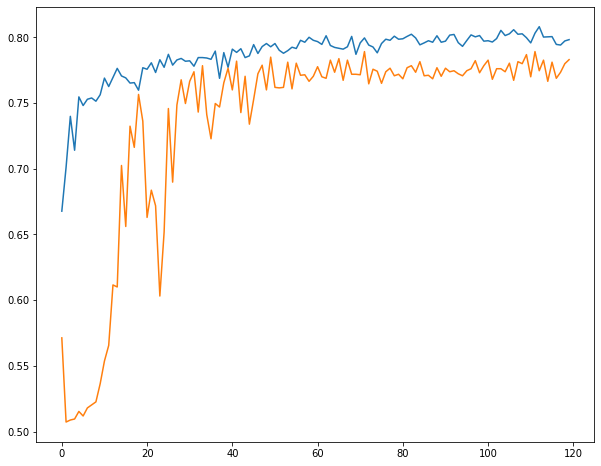

In [41]:
plt.figure(figsize=(10,8))
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
epoch = range(0,len(acc))
plt.plot(epoch,acc)
plt.plot(epoch,val_acc )
plt.show()

In [42]:
result=model.predict(X_t)
result

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [43]:
submission_df = pd.DataFrame()
submission_df['PassengerId'] = df2['PassengerId']
submission_df['Transported'] = result
submission_df['Transported'] = submission_df['Transported'].apply(lambda x: True if x>=0.5 else False)
print(submission_df.head())


  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [61]:
submission_df.to_csv('submission_DNN5.csv',index=False)